                                    Machine Learning with Regression Dataset

Importing the necessary packages as usual and printing the head of the file.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
file = pd.read_csv("concrete.csv")
file.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28,30.650000


Now computing the Basic statistics of the features. 

In [2]:
file.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567281,6.204660,972.918932,773.580484,45.662136,35.817961
std,104.506364,86.279341,63.997004,21.354218,5.973841,77.753955,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800003,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.899994,0.000000,932.000000,730.950012,7.000000,23.710001
50%,272.899994,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445002
75%,350.000000,142.950001,118.300003,192.000000,10.200000,1029.400024,824.000000,56.000000,46.135001
max,540.000000,359.399994,200.100006,247.000000,32.200001,1145.000000,992.599976,365.000000,82.599998


Now plotting the target variable(ConcreteCompressiveStrength) against the other 8 features to find the relationship between them.

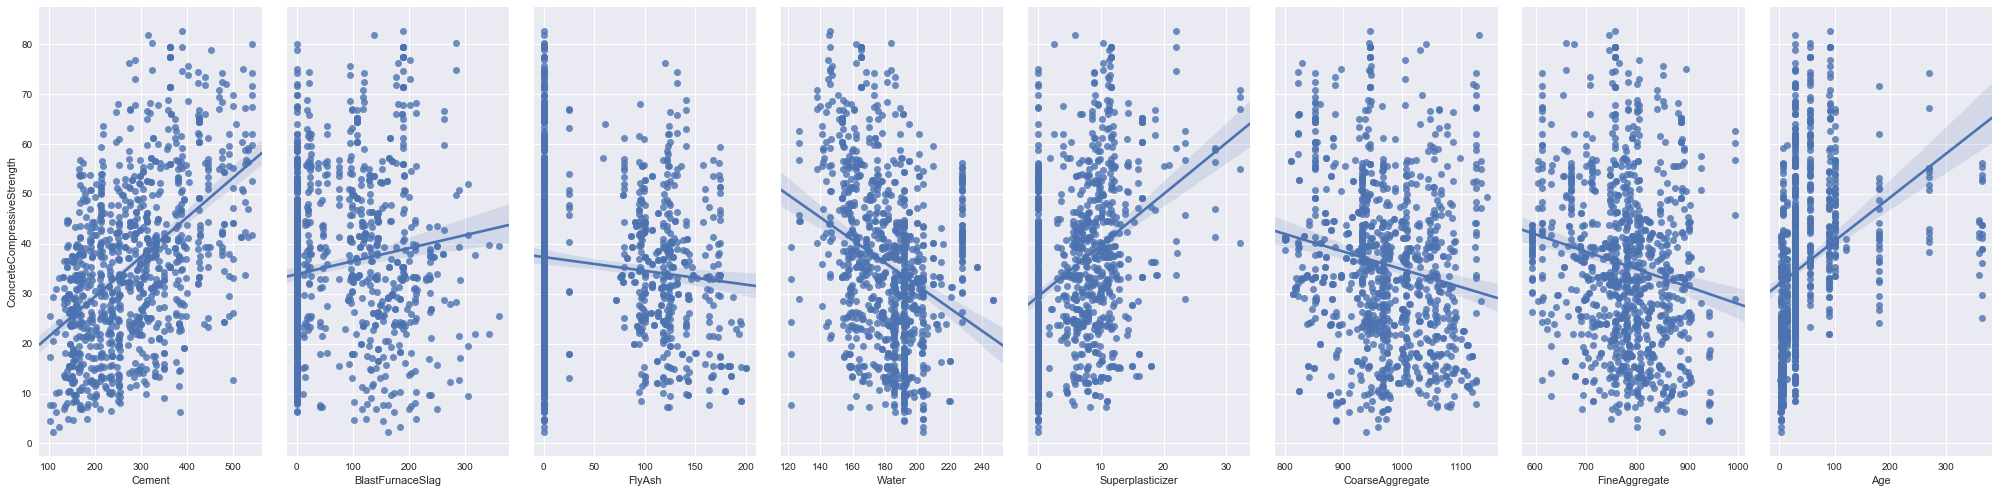

In [3]:
sns.pairplot(file,x_vars=['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age'],y_vars='ConcreteCompressiveStrength',size=7,aspect=0.5,kind='reg')

Now, Splitting the features in X and target in Y variable.

In [4]:
X = file[['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age']]
Y = file[['ConcreteCompressiveStrength']]
X.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28


Now, using the cross validation we split the testing and training data set to perform the prediction.

In [41]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(746, 8)
(284, 8)
(746, 1)
(284, 1)


We perform the simple linear regression with the original dataset without omitting any feature from it and calculating its R2 score, MAE, MSE.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = LinearRegression(normalize=True)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

R2 Score: 0.629260043441
Mean Absolute Error: 7.79429061112
Mean Squared Error: 101.298936094
Coefficients: 
 [[ 0.14096528  0.13276067  0.12034157  0.45606177  0.0485953   0.05324976
   0.10592812]]
Intercept: [-116.73998956]


Now, we use Lasso Regression (L1 Regularization ) which automatically omits the less significant features from the dataset and computes the R2 score, MSE, MAE.

In [61]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5,random_state=42)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

R2 Score: 0.629874774701
Mean Absolute Error: 7.77126218499
Mean Squared Error: 101.130970323
Coefficients: 
 [ 0.06247966  0.03984562  0.01908056  0.02771257  0.03561804 -0.26916361]
Intercept: [ 35.37815966]


Now, We perform Principal Component Analysis (PCA) to find the best feature in the original dataset, so as to improve the R2 score , MAE, MSE.

In [31]:
from sklearn.decomposition import PCA
data = PCA(n_components=6)
reduced_data = data.fit_transform(X)
reduced_data.shape
reduced_data

array([[  -1.30301519,  -87.63184238, -101.4977042 ,  -98.40218566,
         -23.43683747,   41.51214859],
       [  41.63475674,  -74.14074745,  -88.81401595,  -82.17063474,
         -30.45557533,   37.50938348],
       [ -46.17583966, -134.36498511,   53.7303885 ,  -25.44815933,
         -25.60650902,  -22.06567194],
       ..., 
       [-132.83365512, -107.00561854,   -9.50785228,   46.93834752,
           2.03512896,   26.19193702],
       [ 121.49645624,  -38.65006228,  -20.75377037,  -28.88641966,
          12.53757608,   40.96548898],
       [-129.83358272,  174.42530714,  -80.50543446,  -40.18717804,
         -17.56503161,   20.69898562]])

Now we again split PCA performed reduced dataset into training and test dataset.

In [56]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reduced_data,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(746, 6)
(284, 6)
(746, 1)
(284, 1)


Asusual, we feed the transformed data with PCA into Linear Regression, unfortunately it produces R2 score much more lower than the score computed using the original dataset.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = LinearRegression()
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

R2 Score: 0.630008207741
Mean Absolute Error: 7.769233008
Mean Squared Error: 101.094511817
Coefficients: 
 [[ 0.06251399  0.03989351  0.0191509   0.02782909  0.03571841 -0.2695781 ]]
Intercept: [ 35.37765224]


We also try find the results for the Lasso Regression using the transformed data, but still it produces the similar result as above.

In [60]:
from sklearn.decomposition import PCA
data = PCA(n_components=6)
reduced_data = data.fit_transform(X)
reduced_data.shape


from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reduced_data,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5,random_state=42)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

(746, 6)
(284, 6)
(746, 1)
(284, 1)
R2 Score: 0.629874774701
Mean Absolute Error: 7.77126218499
Mean Squared Error: 101.130970323
Coefficients: 
 [ 0.06247966  0.03984562  0.01908056  0.02771257  0.03561804 -0.26916361]
Intercept: [ 35.37815966]


Now, we use Decision Tree Regressor to compute the R2 score, MSE, MAE using the original dataset. Suprisingly, it produces the R2 score of 79%.

In [62]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(746, 8)
(284, 8)
(746, 1)
(284, 1)


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = DecisionTreeRegressor(random_state=0)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))


R2 Score: 0.791977341401
Mean Absolute Error: 4.48021136268
Mean Squared Error: 56.8389611821


Now, trying the above with transformed data, but it produces less values when compared to the original dataset.

In [67]:
from sklearn.decomposition import PCA
data = PCA(n_components=6)
reduced_data = data.fit_transform(X)
reduced_data.shape


from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reduced_data,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=42)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

(746, 6)
(284, 6)
(746, 1)
(284, 1)
R2 Score: 0.610759309223
Mean Absolute Error: 6.85915483451
Mean Squared Error: 106.35397443


So, we find that decision tree regressor does well in predicting the R2 score , so we can boost the decision tree regressor using AdaBoostRegressor(with Original Dataset).

In [71]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
clf = AdaBoostRegressor(DecisionTreeRegressor())
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))


(746, 8)
(284, 8)
(746, 1)
(284, 1)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score: 0.892945535578
Mean Absolute Error: 3.42940141549
Mean Squared Error: 29.250970008


Now, using the AdaBoostRegressor with transformed dataset.

In [70]:
from sklearn.decomposition import PCA
data = PCA(n_components=6)
reduced_data = data.fit_transform(X)
reduced_data.shape


from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reduced_data,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
clf = AdaBoostRegressor(DecisionTreeRegressor())
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

(746, 6)
(284, 6)
(746, 1)
(284, 1)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score: 0.828241354951
Mean Absolute Error: 4.64288615044
Mean Squared Error: 46.9303826053


So, we can also use decision tree regressor with GradientBoostingRegressor(with Original Dataset).

In [73]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))


(746, 8)
(284, 8)
(746, 1)
(284, 1)
R2 Score: 0.89831946689
Mean Absolute Error: 3.78513479392
Mean Squared Error: 27.7826267261


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finally another alternative for gradientBoostingRegressor is XGBRegressor. XGBoost- Xtreme Gradient Boosting is the implementation of the Boosted Gradient Decision Tree.

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.275,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from xgboost import XGBRegressor
clf = XGBRegressor()
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))


(746, 8)
(284, 8)
(746, 1)
(284, 1)
R2 Score: 0.898457366983
Mean Absolute Error: 3.77391620515
Mean Squared Error: 27.7449476671
